In [3]:
import pandas as pd

In [153]:
import warnings; warnings.simplefilter('ignore')

In [342]:
data = pd.read_csv('Seasons_Stats.csv').fillna(value = 0)

In [521]:
voting_data = pd.read_csv('mvp_voting_stats.csv').fillna(value = 0)

In [573]:
data2018 = pd.read_csv('current_season_stats_12_03.csv').fillna(value = 0)

In [339]:
data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,488,1952.0,Paul Arizin*,SF,23.0,PHW,66.0,0.0,2939.0,25.5,...,0.818,0.0,0.0,745.0,170.0,0.0,0.0,0.0,250.0,1674.0
1,489,1952.0,Cliff Barker,SG,31.0,INO,44.0,0.0,494.0,10.8,...,0.588,0.0,0.0,81.0,70.0,0.0,0.0,0.0,56.0,126.0
2,490,1952.0,Don Barksdale*,PF,28.0,BLB,62.0,0.0,2014.0,15.8,...,0.691,0.0,0.0,601.0,137.0,0.0,0.0,0.0,230.0,781.0
3,491,1952.0,Leo Barnhorst,SF,27.0,INO,66.0,0.0,2344.0,15.9,...,0.652,0.0,0.0,430.0,255.0,0.0,0.0,0.0,196.0,820.0
4,492,1952.0,Elmer Behnke,C,22.0,MLH,4.0,0.0,55.0,7.8,...,0.571,0.0,0.0,17.0,4.0,0.0,0.0,0.0,13.0,16.0


In [522]:
voting_data.head()

,Year,Rank,Player,Age,Tm,First,Pts_Won,Pts_Max,Share,G,...,PTS,TRB,AST,STL,BLK,FGr,ThreePr,FTr,WS,WSper48
0,1980,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,...,24.8,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227
1,1980,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,...,26.9,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213
2,1980,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,...,33.1,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173
3,1980,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,...,21.3,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182
4,1980,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,...,14.1,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148


In [343]:
filter = data["Year"] >= 1980
data = data[filter]

In [344]:
len(data)

18927

In [126]:
mvps = {2017:'Russell Westbrook', 2016:'Stephen Curry', 2015:'Stephen Curry', 2014:'Kevin Durant', 2013:'LeBron James',2012:'LeBron James',2011:'Derrick Rose',2010:'LeBron James',2009:'LeBron James',2008:'Kobe Bryant',2007:'Dirk Nowitzki',2006:'Steve Nash',2005:'Steve Nash',2004:'Kevin Garnett',2003:'Tim Duncan',2002:'Tim Duncan',2001:'Allen Iverson',2000:'''Shaquille O'Neal''',1999:'Karl Malone',1998:'Michael Jordan',1997:'Karl Malone',1996:'Michael Jordan',1995:'David Robinson',1994:'Hakeem Olajuwon',1993:'Charles Barkley',1992:'Michael Jordan',1991:'Michael Jordan',1990:'Magic Johnson',1989:'Magic Johnson',1988:'Michael Jordan',1987:'Magic Johnson',1986:'Larry Bird',1985:'Larry Bird',1984:'Larry Bird',1983:'Moses Malone',1982:'Moses Malone',1981:'Julius Erving',1980:'Kareem Abdul-Jabbar'}

In [18]:
from collections import namedtuple

In [78]:
Player = namedtuple('Player', ['Year','Name', 'Pos', 'Games','MP','PER','TSr','ThreePAr','FTRate','ORBr','DRBr','TRBr','ASTr','STLr','BLKr','TOVr','USGr','OWS','DWS','WS','WSper48','OBPM','DBPM','BPM','VORP','FG','FGA','FGr','ThreeP','ThreePA','ThreePr','TwoP','TwoPA','TwoPr','eFGr','FT','FTA','FTr','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])

In [122]:
#Since row.FT%, row.3p, etc is not valid because a valid string cannot have % in it or start with a number, and I don't know how to escape it in this case, I have to use their indexes as below.
#11:TS%, 12:3PAr,14:ORB%,15:DRB%,16:TRB%,17:AST%,18:STL%,19:BLK%,20:TOV%,21:USG%,26:WS/48,34:FG%,35:3P,36:3PA,37:3P%,38:2P,39:2PA,40:2P%,41:eFG%,44:FT%

In [300]:
len(data)

18927

In [366]:
#Combine players who played for multiple teams in the same season
data_refined = []
y = []
mul_team_player = None
for row in data.itertuples():
    # get rid of the * at the end of some players' names
    player_name = None
    if row.Player[-1] == '*':
        player_name = row.Player[0:-1]   
    else:
        player_name = row.Player
    
    # when the current player is new or did not play for multiple teams in the same season
    if mul_team_player != player_name:
        
        data_refined.append(Player(row.Year,player_name,row.Pos,row.G,row.MP,row.PER,row[11],row[12],row.FTr,row[14],row[15],row[16],row[17],row[18],row[19],row[20],row[21],row.OWS,row.DWS,row.WS,row[26],row.OBPM,row.DBPM,row.BPM,row.VORP,row.FG,row.FGA,row[34],row[35],row[36],row[37],row[38],row[39],row[40],row[41],row.FT,row.FTA,row[44],row.ORB,row.DRB,row.TRB,row.AST,row.STL,row.BLK,row.TOV,row.PF,row.PTS))
        # if the team is TOT: the current play has played for multiple teams
        if row.Tm == "TOT":
            mul_team_player = row.Player # mark the name of mul_team_player

In [367]:
len(data_refined)

15578

In [368]:
data_refined[0]

Player(Year=1980.0, Name='Kareem Abdul-Jabbar', Pos='C', Games=82.0, MP=3143.0, PER=25.300000000000001, TSr=0.63900000000000001, ThreePAr=0.001, FTRate=0.34399999999999997, ORBr=7.2000000000000002, DRBr=22.199999999999999, TRBr=15.4, ASTr=16.5, STLr=1.2, BLKr=4.5999999999999996, TOVr=15.699999999999999, USGr=24.100000000000001, OWS=9.5, DWS=5.2999999999999998, WS=14.800000000000001, WSper48=0.22699999999999998, OBPM=4.0, DBPM=2.7000000000000002, BPM=6.7000000000000002, VORP=6.7999999999999998, FG=835.0, FGA=1383.0, FGr=0.60399999999999998, ThreeP=0.0, ThreePA=1.0, ThreePr=0.0, TwoP=835.0, TwoPA=1382.0, TwoPr=0.60399999999999998, eFGr=0.60399999999999998, FT=364.0, FTA=476.0, FTr=0.76500000000000001, ORB=190.0, DRB=696.0, TRB=886.0, AST=371.0, STL=81.0, BLK=280.0, TOV=297.0, PF=216.0, PTS=2034.0)

In [574]:
#Some names ends with "*", so get rid of that. Get X(features) data and y(labels).
X_data = []
X_data_reduced1 = []
X_data_reduced2 = []
y_data = []
for d in data_refined:
    name = d.Name
    if name[-1] == '*':
        name = name[0:-1]
    if mvps[int(d.Year)] == name:
        y_data.append(1)
    else:
        y_data.append(0)
        
    #NOTE: Make sure to change the features here
    features1 = [d.PER,d.TSr,d.ThreePAr,d.FTRate,d.ORBr,d.DRBr,d.TRBr,d.ASTr,d.STLr,d.BLKr,d.TOVr,d.USGr,d.OWS,d.DWS,d.WS,d.WSper48,d.OBPM,d.DBPM,d.BPM,d.VORP,d.FG,d.FGA,d.FGr,d.ThreeP,d.ThreePA,d.ThreePr,d.TwoP,d.TwoPA,d.TwoPr,d.eFGr,d.FT,d.FTA,d.FTr,d.ORB,d.DRB,d.TRB,d.AST,d.STL,d.BLK,d.TOV,d.PF,d.PTS]
    X_data.append(features1) 
    #Ignore
    features2 = [d.Games,d.MP,d.PER,d.TSr,d.ASTr,d.USGr,d.OWS,d.WS,d.WSper48,d.OBPM,d.BPM,d.VORP,d.FT,d.ORB,d.PF]
    X_data_reduced1.append(features2)
    #The 6 features
    features3 = [d.PER,d.TSr,d.USGr,d.WS,d.BPM,d.VORP]
    X_data_reduced2.append(features3)

In [370]:
#From 1980-2017, 38 years so 38 mvps
sum(y_data)

38

In [575]:
len(X_data[0])

42

In [576]:
X_training = X_data[:len(X_data)*3//4]
y_training = y_data[:len(X_data)*3//4]
X_testing = X_data[len(X_data)*3//4:]
y_testing = y_data[len(X_data)*3//4:]

In [513]:
from sklearn import preprocessing

In [514]:
#For normalization, use if needed
std_scale = preprocessing.StandardScaler().fit(X_training)
X_training_std = std_scale.transform(X_training)
X_testing_std = std_scale.transform(X_testing)

In [373]:
X_training_reduced1 = X_data_reduced1[:len(X_data_reduced1)*3//4]
X_testing_reduced1 = X_data_reduced1[len(X_data_reduced1)*3//4:]

In [374]:
len(X_testing)

3895

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [351]:
def evaluate(pred, labels):
    TP=0
    TN=0
    FP=0
    FN=0
    PRECISION = 0
    RECALL = 0
    for (a,b) in zip(pred, labels):
        if (a==True and b==True):
            TP = TP+1
        elif (a==True and b==False):
            FP = FP+1
        elif (a==False and b==True):
            FN = FN+1
        elif (a==False and b==False):
            TN = TN+1
    
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    BER = 1-(TPR+TNR)/2
    if TP+FP == 0:
        PRECISION = 0
    else:
        PRECISION = TP / (TP+FP)
    if TP+FN == 0:
        RECALL = 0
    else:
        RECALL = TP / (TP+FN)
    print("Statistics for our training model: ")
    print("\nTrue positives: " + str(TP))
    print("True negatives: " + str(TN))
    print("False positives: " + str(FP))
    print("False negatives: " + str(FN))
    print("\nAccuracy: " + str((TP + TN)/len(pred)))
    print("BER is " + str(BER))
    print("Precision: " + str(PRECISION))
    print("Recall: " + str(RECALL))
    return PRECISION,RECALL

In [383]:
#Use for graph, only return precision and recall without printing out results
def evaluate_noprint(pred, labels):
    TP=0
    TN=0
    FP=0
    FN=0
    PRECISION = 0
    RECALL = 0
    for (a,b) in zip(pred, labels):
        if (a==True and b==True):
            TP = TP+1
        elif (a==True and b==False):
            FP = FP+1
        elif (a==False and b==True):
            FN = FN+1
        elif (a==False and b==False):
            TN = TN+1
    
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    BER = 1-(TPR+TNR)/2
    if TP+FP == 0:
        PRECISION = 0
    else:
        PRECISION = TP / (TP+FP)
    if TP+FN == 0:
        RECALL = 0
    else:
        RECALL = TP / (TP+FN)

    return PRECISION,RECALL

In [450]:
#Use for classification
clf_RFC = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=2,class_weight = {0:1,1:70})
clf_RFC.fit(X_training, y_training)
pred_RFC = clf_RFC.predict(X_testing)
evaluate(pred_RFC, y_testing)

Statistics for our training model: 

True positives: 8
True negatives: 3862
False positives: 25
False negatives: 0

Accuracy: 0.993581514762516
BER is 0.003215847697453089
Precision: 0.24242424242424243
Recall: 1.0


In [361]:
len(X_testing_reduced1)

3836

In [454]:
clf_RFC_reduced1 = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=0,class_weight = {0:1,1:70})
clf_RFC_reduced1.fit(X_training_reduced1, y_training)
pred_RFC_reduced1 = clf_RFC_reduced1.predict(X_testing_reduced1)
evaluate(pred_RFC_reduced1, y_testing)

Statistics for our training model: 

True positives: 8
True negatives: 3851
False positives: 36
False negatives: 0

Accuracy: 0.9907573812580232
BER is 0.004630820684332404
Precision: 0.18181818181818182
Recall: 1.0


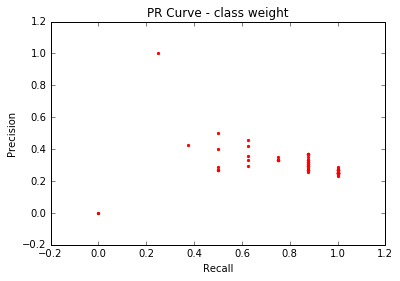

In [629]:
for weight in range(1,70):
    clf_RFC = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=0,class_weight = {0:1,1:weight})
    clf_RFC.fit(X_training, y_training)
    pred_RFC = clf_RFC.predict(X_testing)
    p,r = evaluate_noprint(pred_RFC, y_testing)
    plt.scatter(r, p, color='r', marker=".")


plt.title("PR Curve - class weight")
plt.xlabel("Recall")
plt.ylabel("Precision")
#red_patch = mpatches.Patch(color='r', label='Precision')
#plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
    
plt.show()

In [390]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

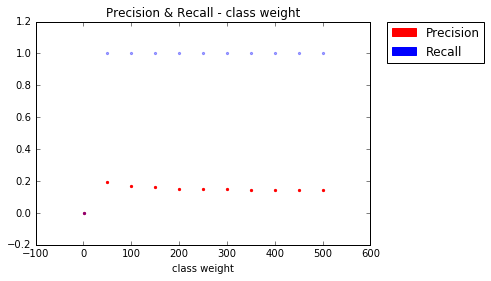

In [395]:
for weight in [1,50,100,150,200,250,300,350,400,450,500]:
    clf_RFC_reduced1 = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=0,class_weight = {0:1,1:weight})
    clf_RFC_reduced1.fit(X_training_reduced1, y_training)
    pred_RFC_reduced1 = clf_RFC_reduced1.predict(X_testing_reduced1)
    p,r = evaluate_noprint(pred_RFC_reduced1, y_testing)
    
    plt.scatter(weight, p, color='r', marker=".")
    plt.scatter(weight, r, color='b', marker=".", alpha=.35)


plt.title("Precision & Recall - class weight")
plt.xlabel("class weight")
red_patch = mpatches.Patch(color='r', label='Precision')
plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
    
plt.show()

In [480]:
clf_LR = LogisticRegression(C=0.01)
clf_LR.fit(X_training, y_training)

pred_RFC_LR = clf_LR.predict(X_testing)
evaluate(pred_RFC_LR, y_testing)

Statistics for our training model: 

True positives: 5
True negatives: 3883
False positives: 4
False negatives: 3

Accuracy: 0.9982028241335045
BER is 0.18801453563159254
Precision: 0.5555555555555556
Recall: 0.625


In [597]:
clf_LR = LogisticRegression(C=0.01)
clf_LR.fit(X_training, y_training)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.5555555555555556 0.625
0.6 0.75
0.5833333333333334 0.875
0.4375 0.875
0.47058823529411764 1.0
0.4 1.0
0.4 1.0
0.4 1.0


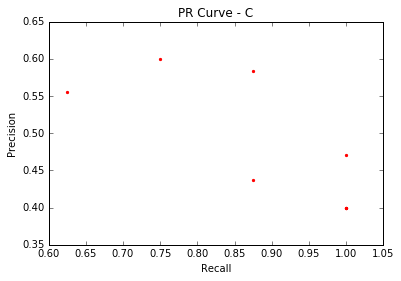

In [482]:
for c in [0.01,0.05,0.1,0.5,1,10,100,1000]:
    clf_LR = LogisticRegression(C=c)
    clf_LR.fit(X_training, y_training)
    pred_LR = clf_LR.predict(X_testing)
    p,r = evaluate_noprint(pred_LR, y_testing)
    print (str(p) + ' ' + str(r))
    plt.scatter(r, p, color='r', marker=".")


plt.title("PR Curve - C")
plt.xlabel("Recall")
plt.ylabel("Precision")
#red_patch = mpatches.Patch(color='r', label='Precision')
#plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
    
plt.show()

In [ ]:
for weight in range(1,70):
    clf_RFC = RandomForestClassifier(n_estimators=100,max_depth=3, random_state=0,class_weight = {0:1,1:weight})
    clf_RFC.fit(X_training, y_training)
    pred_RFC = clf_RFC.predict(X_testing)
    p,r = evaluate_noprint(pred_RFC, y_testing)
    print (str(p) + ' ' + str(r))
    plt.scatter(r, p, color='r', marker=".")


plt.title("PR Curve - class weight")
plt.xlabel("Recall")
plt.ylabel("Precision")
#red_patch = mpatches.Patch(color='r', label='Precision')
#plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
    
plt.show()

In [249]:
from sklearn import svm

In [435]:
clf_svm1 = svm.SVC(C=1000,decision_function_shape='ovo',class_weight = {0:1,1:1000},random_state=2)
clf_svm1.fit(X_training, y_training)
pred_svm1 = clf_svm1.predict(X_testing)
evaluate(pred_svm1, y_testing)

Statistics for our training model: 

True positives: 0
True negatives: 3887
False positives: 0
False negatives: 8

Accuracy: 0.9979460847240051
BER is 0.5
Precision: 0
Recall: 0.0


In [430]:
clf_svm2 = svm.LinearSVC(class_weight = {0:1,1:1000000}, random_state = 0)
clf_svm2.fit(X_training, y_training)
pred_svm2 = clf_svm2.predict(X_testing)
evaluate(pred_svm2, y_testing)

Statistics for our training model: 

True positives: 0
True negatives: 3886
False positives: 1
False negatives: 8

Accuracy: 0.9976893453145058
BER is 0.5001286339078981
Precision: 0.0
Recall: 0.0


In [ ]:
for weight in range(1,1000000,100):
    clf_svm2 = svm.LinearSVC(decision_function_shape='ovo',class_weight = {0:1,1:weight})
    clf_svm2.fit(X_training, y_training)
    pred_svm2 = clf_svm2.predict(X_testing)
    p,r = evaluate_noprint(pred_svm2, y_testing)
    
    plt.scatter(weight, p, color='r', marker=".")
    plt.scatter(weight, r, color='b', marker=".", alpha=.35)


plt.title("PR Curve - class weight - LinearSVC")
plt.xlabel("class weight")
red_patch = mpatches.Patch(color='r', label='Precision')
plt.legend(handles=[red_patch,blue_patch],bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
    
plt.show()

In [405]:
from sklearn.svm import SVR

In [412]:
from sklearn.linear_model import LogisticRegression

In [ ]:
votingDict = defaultdict(lambda:defaultdict(float))
for row in voting_data.itertuples():
    votingDict[row.Year][row.Player] = row.Share

In [631]:
#Construct training data for top1 prediction, use data from before 2010
X_training_top1 = []
y_training_top1 = []
y_training_vote = [] #Use vote share as y labels
X_training_vote_6 = []
for d in data_refined:
    year = d.Year
    name = d.Name
    if name[-1] == '*':
        name = name[0:-1]
    if year < 2010:
        if mvps[int(d.Year)] == name:
            y_training_top1.append(1)
        else:
            y_training_top1.append(0)
        y_training_vote.append(votingDict[year][name])
    
        #NOTE: change features here
        features = [d.PER,d.TSr,d.ThreePAr,d.FTRate,d.ORBr,d.DRBr,d.TRBr,d.ASTr,d.STLr,d.BLKr,d.TOVr,d.USGr,d.OWS,d.DWS,d.WS,d.WSper48,d.OBPM,d.DBPM,d.BPM,d.VORP]
        X_training_top1.append(features)
        
        features2 = [d.PER,d.TSr,d.USGr,d.WS,d.BPM,d.VORP]
        X_training_vote_6.append(features2)

In [619]:
#Normalization, use if needed
std_scale = preprocessing.StandardScaler().fit(X_training_top1)
X_training_top1_std = std_scale.transform(X_training_top1)

In [620]:
#Random forest regressor, for top1 prediction
clf_RFR = RandomForestRegressor(n_estimators = 10,max_depth=3, random_state=0)
clf_RFR.fit(X_training_top1_std, y_training_top1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [605]:
#Random forest regressor, for top1 prediction, vote as labels
clf_RFR_vote = RandomForestRegressor(n_estimators = 10,max_depth=2, random_state=0)
clf_RFR_vote.fit(X_training_top1, y_training_vote)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [570]:
#Random forest regressor, for top1 prediction
clf_RFR_vote_6 = RandomForestRegressor(n_estimators = 100,max_depth=2, random_state=0)
clf_RFR_vote_6.fit(X_training_vote_6, y_training_vote)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [579]:
clf_RFR.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.01605433,  0.        ,
        0.        ,  0.02358569,  0.01312634,  0.        ,  0.01323872,
        0.04551988,  0.01305729,  0.01347416,  0.02920457,  0.43628967,
        0.02478699,  0.        ,  0.00659142,  0.01673792,  0.03738397,
        0.        ,  0.02432199,  0.        ,  0.        ,  0.        ,
        0.05997888,  0.        ,  0.01445336,  0.        ,  0.01479575,
        0.01956489,  0.        ,  0.0723487 ,  0.0069289 ,  0.02283523,
        0.03324094,  0.01168716,  0.01789982,  0.00412356,  0.        ,
        0.00876986,  0.        ])

In [495]:
sum(y_training_top1)

30000

In [524]:
from collections import defaultdict

In [571]:
#Use 6 features, vote as y labels
#Construct testing data for top1 prediction
X_testing_vote_6 = {}
for i in range(2010,2018):
    X1 = []
    for d in data_refined:
        year = d.Year
        if year == i:
            tmp2 = [d.Name,d.PER,d.TSr,d.USGr,d.WS,d.BPM,d.VORP]
            X1.append(tmp2)
    X_testing_vote_6[i] = X1
    
correct = 0
for year in range(2010,2018):
    #X is all players' data of that year. Make prediction on each then sort in descending order
    X = X_testing_vote_6[year]
    print (str(year) + ' mvp was ' + str(mvps[year]))
    for idx in range(len(X)):
        pred = clf_RFR_vote_6.predict(X[idx][1:])
        X[idx] = [pred] + X[idx] 
    X.sort(reverse = True)
    
    #in case of a tie, get all the top ranking players
    tops = [X[0][1]]
    for idx in range(1,len(X)):
        if X[idx][0] == X[0][0]:
            tops.append(X[idx][1])
        else:
            break
            
    print ('    Top 5 in our predictions are below: ')
    for i in range(5):
        print ('    ' + str(X[i][1]) + ' has score ' + str(X[i][0]))
    if mvps[year] in tops:
        correct += 1
        print ('predict CORRECT for year ' + str(year))
    else:
        print ('predict INCORRECT for year ' + str(year))
    print ()
print ('Total correct are ' + str(correct) + ' out of 8')

2010 mvp was LeBron James
    Top 5 in our predictions are below: 
    LeBron James has score [ 0.67696037]
    Kevin Durant has score [ 0.47684729]
    Dwyane Wade has score [ 0.15124608]
    Dwight Howard has score [ 0.14532172]
    Dirk Nowitzki has score [ 0.10491665]
predict CORRECT for year 2010

2011 mvp was Derrick Rose
    Top 5 in our predictions are below: 
    LeBron James has score [ 0.50091604]
    Pau Gasol has score [ 0.268787]
    Dwight Howard has score [ 0.25017855]
    Chris Paul has score [ 0.18668957]
    Derrick Rose has score [ 0.14168401]
predict INCORRECT for year 2011

2012 mvp was LeBron James
    Top 5 in our predictions are below: 
    LeBron James has score [ 0.31489782]
    Chris Paul has score [ 0.13438565]
    Kevin Durant has score [ 0.10277445]
    Manu Ginobili has score [ 0.02195681]
    Kyrylo Fesenko has score [ 0.02195681]
predict CORRECT for year 2012

2013 mvp was LeBron James
    Top 5 in our predictions are below: 
    LeBron James has score

In [632]:
#Construct testing data for top1 prediction
X_testing_top1 = {}
for i in range(2010,2018):
    X = []
    X1 = []
    for d in data_refined:
        year = d.Year
        if year == i:
            tmp = [d.Name,d.Games,d.MP,d.PER,d.TSr,d.ThreePAr,d.FTRate,d.ORBr,d.DRBr,d.TRBr,d.ASTr,d.STLr,d.BLKr,d.TOVr,d.USGr,d.OWS,d.DWS,d.WS,d.WSper48,d.OBPM,d.DBPM,d.BPM,d.VORP,d.FG,d.FGA,d.FGr,d.ThreeP,d.ThreePA,d.ThreePr,d.TwoP,d.TwoPA,d.TwoPr,d.eFGr,d.FT,d.FTA,d.FTr,d.ORB,d.DRB,d.TRB,d.AST,d.STL,d.BLK,d.TOV,d.PF,d.PTS]
            X.append(tmp)
            tmp2 = [d.PER,d.TSr,d.USGr,d.WS,d.BPM,d.VORP]
            X1.append(tmp2)
    X_testing_top1[i] = X
    
correct = 0
for year in range(2010,2018):
    #X is all players' data of that year. Make prediction on each then sort in descending order
    X = X_testing_top1[year]
    print (str(year) + ' mvp was ' + str(mvps[year]))
    for idx in range(len(X)):
        pred = clf_RFR.predict(X[idx][1:])
        X[idx] = [pred] + X[idx] 
    X.sort(reverse = True)
    
    #in case of a tie, get all the top ranking players
    tops = [X[0][1]]
    for idx in range(1,len(X)):
        if X[idx][0] == X[0][0]:
            tops.append(X[idx][1])
        else:
            break
            
    print ('    Top 5 in our predictions are below: ')
    for i in range(5):
        print ('    ' + str(X[i][1]) + ' has score ' + str(X[i][0]))
    if mvps[year] in tops:
        correct += 1
        print ('predict CORRECT for year ' + str(year))
    else:
        print ('predict INCORRECT for year ' + str(year))
    print ()
print ('Total correct are ' + str(correct) + ' out of 8')

2010 mvp was LeBron James


ValueError: Number of features of the model must  match the input. Model n_features is 20 and  input n_features is 44 

In [628]:
#Predict 2018 MVP
#Construct testing data for top1 prediction
X_testing_2018 = []
for row in data2018.itertuples():
    tmp = [row.PER,row[11],row[12],row.FTr,row[14],row[15],row[16],row[17],row[18],row[19],row[20],row[21],row.OWS,row.DWS,row.WS,row[26],row.OBPM,row.DBPM,row.BPM,row.VORP]
    #tmp = [d.Player,d.PER,d.TSr,d.ThreePAr,d.FTRate,d.ORBr,d.DRBr,d.TRBr,d.ASTr,d.STLr,d.BLKr,d.TOVr,d.USGr,d.OWS,d.DWS,d.WS,d.WSper48,d.OBPM,d.DBPM,d.BPM,d.VORP,d.FG,d.FGA,d.FGr,d.ThreeP,d.ThreePA,d.ThreePr,d.TwoP,d.TwoPA,d.TwoPr,d.eFGr,d.FT,d.FTA,d.FTr,d.ORB,d.DRB,d.TRB,d.AST,d.STL,d.BLK,d.TOV,d.PF,d.PTS]
    X_testing_2018.append(tmp)
    
#X is all players' data of that year. Make prediction on each then sort in descending order
std_scale = preprocessing.StandardScaler().fit(X_testing_2018)
X_testing_2018_std = std_scale.transform(X_testing_2018)

i = 0
X_testing_2018_stdd = []
for row in data2018.itertuples():
    tp = [row.Player]
    for item in X_testing_2018_std[i]:
        tp.append(item)
    X_testing_2018_stdd.append(tp)
    i += 1
    
for idx in range(len(X_testing_2018_stdd)):
    pred = clf_RFR.predict(X_testing_2018_stdd[idx][1:])
    X_testing_2018_stdd[idx] = [pred] + X_testing_2018_stdd[idx] 
X_testing_2018_stdd.sort(reverse = True)
    
    #in case of a tie, get all the top ranking players
tops = [X_testing_2018_stdd[0][1]]
for idx in range(1,len(X_testing_2018_stdd)):
    if X_testing_2018_stdd[idx][0] == X_testing_2018_stdd[0][0]:
        tops.append(X_testing_2018_stdd[idx][1])
    else:
        break
            
print ('    Top 5 in our predictions are below: ')
for i in range(30):
    print ('    ' + str(X_testing_2018_stdd[i][1]) + ' has score ' + str(X_testing_2018_stdd[i][0]))


    Top 5 in our predictions are below: 
    LeBron James has score [ 0.66782581]
    James Harden has score [ 0.53361529]
    Giannis Antetokounmpo has score [ 0.15558399]
    Anthony Davis has score [ 0.13832094]
    Stephen Curry has score [ 0.04051557]
    LaMarcus Aldridge has score [ 0.01772965]
    Damian Lillard has score [ 0.01772965]
    Joakim Noah has score [ 0.01274991]
    Matt Costello has score [ 0.01117097]
    Kyrie Irving has score [ 0.00610175]
    Russell Westbrook has score [ 0.00346977]
    Paul George has score [ 0.00346977]
    Jayson Tatum has score [ 0.00346977]
    Andre Drummond has score [ 0.00346977]
    Al Horford has score [ 0.00346977]
    Vince Hunter has score [ 0.00168143]
    Kyle Singler has score [ 0.00168143]
    Jamil Wilson has score [ 0.00168143]
    Jack Cooley has score [ 0.00168143]
    Zhou Qi has score [ 0.00010248]
    Zaza Pachulia has score [ 0.00010248]
    Zach Randolph has score [ 0.00010248]
    Zach Collins has score [ 0.00010248

In [618]:
clf_RFR.feature_importances_

array([  7.49943117e-02,   0.00000000e+00,   0.00000000e+00,
         3.98633521e-02,   1.73348815e-02,   1.25643629e-02,
         5.61053922e-02,   2.09824211e-02,   9.59803587e-03,
         1.33859152e-02,   4.59987631e-02,   2.13614855e-04,
         7.37386062e-02,   6.31875883e-02,   4.29524355e-01,
         3.12267920e-02,   0.00000000e+00,   3.15558016e-02,
         3.69840119e-02,   4.27417949e-02])

In [594]:
print (X_testing_2018[2])

[array([ 1.68142562]), 'Nikola Jokic', 24.699999999999999, 0.245, 9.6999999999999993, 0.245, 20.0, 24.899999999999999, 2.2999999999999998, 1.8, 14.699999999999999, 21.699999999999999, 2.0, 0.90000000000000002, 2.0, 0.90000000000000002, 2.8999999999999999, 7.2000000000000002, 4.5999999999999996, 2.6000000000000001, 7.2000000000000002, 1.3999999999999999]


In [559]:
#Random Forest regressor, all features
#Construct testing data for top1 prediction
X_testing_top1 = {}
for i in range(2010,2018):
    X = []
    for d in data_refined:
        year = d.Year
        if year == i:
            tmp = [d.Name,d.Games,d.MP,d.PER,d.TSr,d.ThreePAr,d.FTRate,d.ORBr,d.DRBr,d.TRBr,d.ASTr,d.STLr,d.BLKr,d.TOVr,d.USGr,d.OWS,d.DWS,d.WS,d.WSper48,d.OBPM,d.DBPM,d.BPM,d.VORP,d.FG,d.FGA,d.FGr,d.ThreeP,d.ThreePA,d.ThreePr,d.TwoP,d.TwoPA,d.TwoPr,d.eFGr,d.FT,d.FTA,d.FTr,d.ORB,d.DRB,d.TRB,d.AST,d.STL,d.BLK,d.TOV,d.PF,d.PTS]
            X.append(tmp)
            y_training_vote.append(votingDict[year][d.Name])
    X_testing_top1[i] = X
    
correct = 0
for year in range(2010,2018):
    #X is all players' data of that year. Make prediction on each then sort in descending order
    X = X_testing_top1[year]
    print (str(year) + ' mvp was ' + str(mvps[year]))
    for idx in range(len(X)):
        pred = clf_RFR_vote.predict(X[idx][1:])
        X[idx] = [pred] + X[idx] 
    X.sort(reverse = True)
    
    #in case of a tie, get all the top ranking players
    tops = [X[0][1]]
    for idx in range(1,len(X)):
        if X[idx][0] == X[0][0]:
            tops.append(X[idx][1])
        else:
            break
            
    print ('    Top 5 in our predictions are below: ')
    for i in range(5):
        print ('    ' + str(X[i][1]) + ' has score ' + str(X[i][0]))
    if mvps[year] in tops:
        correct += 1
        print ('predict CORRECT for year ' + str(year))
    else:
        print ('predict INCORRECT for year ' + str(year))
    print ()
print ('Total correct are ' + str(correct) + ' out of 8')

2010 mvp was LeBron James
    Top 5 in our predictions are below: 
    LeBron James has score [ 0.55332952]
    Kevin Durant has score [ 0.44584881]
    Dwyane Wade has score [ 0.12847746]
    Dwight Howard has score [ 0.12847746]
    Dirk Nowitzki has score [ 0.11177297]
predict CORRECT for year 2010

2011 mvp was Derrick Rose
    Top 5 in our predictions are below: 
    LeBron James has score [ 0.44584881]
    Pau Gasol has score [ 0.24501943]
    Dwight Howard has score [ 0.23008413]
    Chris Paul has score [ 0.13587438]
    Dwyane Wade has score [ 0.12847746]
predict INCORRECT for year 2011

2012 mvp was LeBron James
    Top 5 in our predictions are below: 
    LeBron James has score [ 0.30817173]
    Chris Paul has score [ 0.17181606]
    Kevin Durant has score [ 0.11177297]
    Tim Duncan has score [ 0.00619477]
    Russell Westbrook has score [ 0.00619477]
predict CORRECT for year 2012

2013 mvp was LeBron James
    Top 5 in our predictions are below: 
    LeBron James has scor

In [532]:
print (y_training_vote[:20])

[0.66500000000000004, 0.0, 0.0, 0.0090000000000000011, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.068000000000000005, 0.0, 0.0]


In [517]:
X_training_top1_std = std_scale.transform(X_training_top1)

In [552]:
clf_svr = SVR()
clf_svr.fit(X_training_top1, y_training_vote)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [553]:
#SVR
#Construct testing data for top1 prediction
X_testing_top1 = {}
for i in range(2010,2018):
    X = []
    for d in data_refined:
        year = d.Year
        if year == i:
            tmp = [d.Name,d.Games,d.MP,d.PER,d.TSr,d.ThreePAr,d.FTRate,d.ORBr,d.DRBr,d.TRBr,d.ASTr,d.STLr,d.BLKr,d.TOVr,d.USGr,d.OWS,d.DWS,d.WS,d.WSper48,d.OBPM,d.DBPM,d.BPM,d.VORP,d.FG,d.FGA,d.FGr,d.ThreeP,d.ThreePA,d.ThreePr,d.TwoP,d.TwoPA,d.TwoPr,d.eFGr,d.FT,d.FTA,d.FTr,d.ORB,d.DRB,d.TRB,d.AST,d.STL,d.BLK,d.TOV,d.PF,d.PTS]
            X.append(tmp)
    X_testing_top1[i] = X

correct = 0
for year in range(2010,2018):
    #X is all players' data of that year. Make prediction on each then sort in descending order
    X = X_testing_top1[year]
    print (str(year) + ' mvp was ' + str(mvps[year]))
    for idx in range(len(X)):
        pred = clf_svr.predict(std_scale.transform(X[idx][1:]))
        X[idx] = [pred] + X[idx] 
    X.sort(reverse = True)
    
    #in case of a tie, get all the top ranking players
    tops = [X[0][1]]
    for idx in range(1,len(X)):
        if X[idx][0] == X[0][0]:
            tops.append(X[idx][1])
        else:
            break
            
    print ('    Top 5 in our predictions are below: ')
    for i in range(5):
        print ('    ' + str(X[i][1]) + ' has score ' + str(X[i][0]))
    if mvps[year] in tops:
        correct += 1
        print ('predict CORRECT for year ' + str(year))
    else:
        print ('predict INCORRECT for year ' + str(year))
    print ()
print ('Total correct are ' + str(correct) + ' out of 8')

2010 mvp was LeBron James
    Top 5 in our predictions are below: 
    Ryan Bowen has score [ 0.1035583]
    Trey Gilder has score [ 0.10355812]
    LeBron James has score [ 0.10355711]
    Dwight Howard has score [ 0.10355369]
    Kevin Durant has score [ 0.10354947]
predict INCORRECT for year 2010

2011 mvp was Derrick Rose
    Top 5 in our predictions are below: 
    Marcus Banks has score [ 0.10355839]
    Dwight Howard has score [ 0.10355424]
    Bobby Simmons has score [ 0.10355002]
    Hassan Whiteside has score [ 0.10354991]
    LeBron James has score [ 0.1035498]
predict INCORRECT for year 2011

2012 mvp was LeBron James
    Top 5 in our predictions are below: 
    Keith Benson has score [ 0.10354587]
    Hamady N'Diaye has score [ 0.1035442]
    Brian Skinner has score [ 0.10354279]
    Dan Gadzuric has score [ 0.10354048]
    Kyrylo Fesenko has score [ 0.10354021]
predict INCORRECT for year 2012

2013 mvp was LeBron James
    Top 5 in our predictions are below: 
    Darko Mi

In [602]:
clf_LR = LogisticRegression()
clf_LR.fit(X_training_top1, y_training_top1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [601]:
sum(y_training_top1)

30000

In [464]:
#LR
#Construct testing data for top1 prediction
X_testing_top1 = {}
for i in range(2010,2018):
    X = []
    for d in data_refined:
        year = d.Year
        if year == i:
            tmp = [d.Name,d.Games,d.MP,d.PER,d.TSr,d.ThreePAr,d.FTRate,d.ORBr,d.DRBr,d.TRBr,d.ASTr,d.STLr,d.BLKr,d.TOVr,d.USGr,d.OWS,d.DWS,d.WS,d.WSper48,d.OBPM,d.DBPM,d.BPM,d.VORP,d.FG,d.FGA,d.FGr,d.ThreeP,d.ThreePA,d.ThreePr,d.TwoP,d.TwoPA,d.TwoPr,d.eFGr,d.FT,d.FTA,d.FTr,d.ORB,d.DRB,d.TRB,d.AST,d.STL,d.BLK,d.TOV,d.PF,d.PTS]
            X.append(tmp)
    X_testing_top1[i] = X

correct = 0
for year in range(2010,2018):
    #X is all players' data of that year. Make prediction on each then sort in descending order
    X = X_testing_top1[year]
    print (str(year) + ' mvp was ' + str(mvps[year]))
    for idx in range(len(X)):
        pred = clf_LR.predict(X[idx][1:])
        X[idx] = [pred] + X[idx] 
    X.sort(reverse = True)
    
    #in case of a tie, get all the top ranking players
    tops = [X[0][1]]
    for idx in range(1,len(X)):
        if X[idx][0] == X[0][0]:
            tops.append(X[idx][1])
        else:
            break
            
    print ('    Top 5 in our predictions are below: ')
    for i in range(10):
        print ('    ' + str(X[i][1]) + ' has score ' + str(X[i][0]))
    if mvps[year] in tops:
        correct += 1
        print ('predict CORRECT for year ' + str(year))
    else:
        print ('predict INCORRECT for year ' + str(year))
    print ()
print ('Total correct are ' + str(correct) + ' out of 8')

2010 mvp was LeBron James
    Top 5 in our predictions are below: 
    LeBron James has score [1]
    Kevin Durant has score [1]
    Zydrunas Ilgauskas has score [0]
    Zaza Pachulia has score [0]
    Zach Randolph has score [0]
    Yi Jianlian has score [0]
    Yakhouba Diawara has score [0]
    Wilson Chandler has score [0]
    Willie Green has score [0]
    Will Conroy has score [0]
predict CORRECT for year 2010

2011 mvp was Derrick Rose
    Top 5 in our predictions are below: 
    LeBron James has score [1]
    Derrick Rose has score [1]
    Zydrunas Ilgauskas has score [0]
    Zaza Pachulia has score [0]
    Zach Randolph has score [0]
    Zabian Dowdell has score [0]
    Yi Jianlian has score [0]
    Yao Ming has score [0]
    Xavier Henry has score [0]
    Wilson Chandler has score [0]
predict CORRECT for year 2011

2012 mvp was LeBron James
    Top 5 in our predictions are below: 
    LeBron James has score [1]
    Kevin Durant has score [1]
    Zaza Pachulia has score [0]
  

In [607]:
#LR, 2018 MVP prediction
#Construct testing data for top1 prediction
X_testing_2018 = []
for row in data2018.itertuples():
    tmp = [row.Player,row.PER,row[11],row[12],row.FTr,row[14],row[15],row[16],row[17],row[18],row[19],row[20],row[21],row.OWS,row.DWS,row.WS,row[26],row.OBPM,row.DBPM,row.BPM,row.VORP]
    #tmp = [d.Player,d.PER,d.TSr,d.ThreePAr,d.FTRate,d.ORBr,d.DRBr,d.TRBr,d.ASTr,d.STLr,d.BLKr,d.TOVr,d.USGr,d.OWS,d.DWS,d.WS,d.WSper48,d.OBPM,d.DBPM,d.BPM,d.VORP,d.FG,d.FGA,d.FGr,d.ThreeP,d.ThreePA,d.ThreePr,d.TwoP,d.TwoPA,d.TwoPr,d.eFGr,d.FT,d.FTA,d.FTr,d.ORB,d.DRB,d.TRB,d.AST,d.STL,d.BLK,d.TOV,d.PF,d.PTS]
    X_testing_2018.append(tmp)
    
#X is all players' data of that year. Make prediction on each then sort in descending order


for idx in range(len(X_testing_2018)):
    pred = clf_LR.predict(X_testing_2018[idx][1:])
    X_testing_2018[idx] = [pred] + X_testing_2018[idx] 
X_testing_2018.sort(reverse = True)
    
    #in case of a tie, get all the top ranking players
tops = [X_testing_2018[0][1]]
for idx in range(1,len(X_testing_2018)):
    if X_testing_2018[idx][0] == X_testing_2018[0][0]:
        tops.append(X_testing_2018[idx][1])
    else:
        break
            
print ('    Top 5 in our predictions are below: ')
for i in range(5):
    print ('    ' + str(X_testing_2018[i][1]) + ' has score ' + str(X_testing_2018[i][0]))


    Top 5 in our predictions are below: 
    Zhou Qi has score [0]
    Zaza Pachulia has score [0]
    Zach Randolph has score [0]
    Zach Collins has score [0]
    Yogi Ferrell has score [0]


In [608]:
clf_LR.coef_

array([[-0.12122852, -1.24469802, -1.15701047, -0.73808842, -0.69939502,
        -0.70253132,  1.21371234,  0.02361416, -1.54105108, -0.28496401,
        -0.14495539, -0.06552083,  0.01463959,  0.50993109,  0.60230467,
        -0.01790966,  0.13569576,  0.22281577,  0.38421771, -0.27187013]])